<a href="https://colab.research.google.com/github/glaiml/prj8-neural-net-img-classification/blob/master/vgk-neuner-img-classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vinayak G Kudva Project submission for GLAIML 
https://github.com/glaiml/prj8-neural-net-img-classification

# The Real Problem

Recognizing multi-digit numbers in photographs captured at street level is an important
component of modern-day map making. A classic example of a corpus of such street
level photographs is Google’s Street View imagery comprised of hundreds of millions of
geo-located 360 degree panoramic images. The ability to automatically transcribe an
address number from a geo-located patch of pixels and associate the transcribed
number with a known street address helps pinpoint, with a high degree of accuracy, the
location of the building it represents.
More broadly, recognizing numbers in photographs is a problem of interest to the optical
character recognition community. While OCR on constrained domains like document
processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual
appearance of text in the wild on account of a large range of fonts, colors, styles,
orientations, and character arrangements. The recognition problem is further
complicated by environmental factors such as lighting, shadows, specularities, and
occlusions as well as by image acquisition factors such as resolution, motion, and focus
blurs.
In this project we will use dataset with images centred around a single digit (many of the
images do contain some distractors at the sides). Although we are taking a sample of
the data which is simpler, it is more complex than MNIST because of the distractors.

# Project Description
In this hands-on project the goal is to build a python code for image classification from
scratch to understand the nitty gritties of building and training a model and further to
understand the advantages of neural networks. First we will implement a simple KNN
classifier and later implement a Neural Network to classify the images in the SVHN
dataset. We will compare the computational efficiency and accuracy between the
traditional methods and neural networks.

# The Street View House Numbers (SVHN) Dataset
SVHN is a real-world image dataset for developing machine learning and object
recognition algorithms with minimal requirement on data formatting but comes from a
significantly harder, unsolved, real world problem (recognizing digits and numbers in
natural scene images). SVHN is obtained from house numbers in Google Street View
images.

# Overview
The images come in two formats as shown below.
Format 1 : Original images with character level bounding boxes.
Format 2 : MNIST-like 32-by-32 images centered around a single character (many
of the images do contain some distractors at the sides).

The goal of this project is to take an image from the SVHN dataset and determine what that digit is.
This is a multi-class classification problem with 10 classes, one for each digit 0-9. Digit '1' has label 1,
'9' has label 9 and '0' has label 10.
Although, there are close to 6,00,000 images in this dataset, we have extracted 60,000 images
(42000 training and 18000 test images) to do this project. The data comes in a MNIST-like format of
32-by-32 RGB images centred around a single digit (many of the images do contain some distractors
at the sides).

# Reference
Acknowledgement for the datasets.
Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng
Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop
on Deep Learning and Unsupervised Feature Learning 2011. (https://research.google/pubs/pub37648/)

http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

# Downloads

Refer to Olympus for project related files and instructions.
Data Set:
● The name of the dataset is SVHN_single_grey1.h5
● The data is a subset of the original dataset. Use this subset only for the
project.
● Keep a copy of your dataset in your own google drive.

# Project Objectives
The objective of the project is to learn how to implement a simple image classification
pipeline based on the k-Nearest Neighbour and a deep neural network.

Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

## Connect to my drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Data fetching and understand the train/val/test splits

In [0]:
import h5py
import numpy as np

# Open the file as readonly
h5f = h5py.File('/content/drive/My Drive/Colab Notebooks/NuNetProject/SVHN_single_grey1.h5', 'r')

# Load the training, test and validation set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

In [4]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


In [5]:
# Flatten X Train and X Test
X_train_flat = X_train.reshape(42000, 1024)
print (X_train_flat.shape)

X_test_flat = X_test.reshape(18000, 1024)
print (X_test_flat.shape)


(42000, 1024)
(18000, 1024)


# Implement and apply an optimal k-Nearest Neighbor (kNN) classifier (7.5 points)

[0.6113888888888889, 0.6208888888888889, 0.6264444444444445, 0.6285555555555555, 0.6312222222222222, 0.6348333333333334, 0.6371111111111111, 0.6392222222222222, 0.6396111111111111, 0.6429444444444444, 0.6433333333333333, 0.6411111111111111, 0.6442222222222223, 0.6436111111111111, 0.6438888888888888, 0.6438333333333334, 0.6447222222222222, 0.6450555555555556, 0.6444444444444445, 0.6449444444444444, 0.6467777777777778, 0.6475555555555556, 0.6478888888888888, 0.6468888888888888, 0.6478333333333334, 0.6474444444444445, 0.6479444444444444, 0.6471111111111111, 0.647, 0.6461666666666667, 0.6465, 0.6461111111111111, 0.6450555555555556, 0.6441111111111111, 0.6438888888888888]


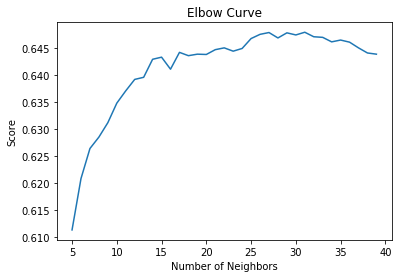

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as pl
Nc = range(5, 40)
knnElbow = [KNeighborsClassifier(n_neighbors=i, weights='distance', metric = 'cosine', n_jobs = 50) for i in Nc]
knnElbow
score = [knnElbow[j].fit(X_train_flat, y_train).score(X_test_flat, y_test) for j in range(len(knnElbow))]
print(score)
pl.plot(Nc,score)
pl.xlabel('Number of Neighbors')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [0]:
KNC = KNeighborsClassifier(n_neighbors= 15, weights='distance', metric = 'cosine', n_jobs = 50)
# Call Nearest Neighbour algorithm

KNC.fit(X_train_flat, y_train)
pred_train = KNC.predict(X_train_flat)

In [10]:
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)
print ("Training Accuracy ::")
KNC.score(X_train_flat, y_train)

Training Accuracy ::


1.0

In [0]:
pred_y = KNC.predict(X_test_flat)

In [12]:
print ("Test Accuracy ::")
KNC.score(X_test_flat, y_test)

Test Accuracy ::


0.6433333333333333

# Print the classification metric report (2.5 points)

In [14]:
from sklearn import metrics
print("KNN Metrics = \n", metrics.classification_report(y_test, pred_y))

KNN Metrics = 
               precision    recall  f1-score   support

           0       0.59      0.74      0.65      1814
           1       0.58      0.79      0.67      1828
           2       0.76      0.62      0.69      1803
           3       0.60      0.54      0.57      1719
           4       0.73      0.78      0.75      1812
           5       0.68      0.51      0.58      1768
           6       0.62      0.56      0.59      1832
           7       0.74      0.75      0.74      1808
           8       0.55      0.55      0.55      1812
           9       0.64      0.59      0.61      1804

    accuracy                           0.64     18000
   macro avg       0.65      0.64      0.64     18000
weighted avg       0.65      0.64      0.64     18000



# Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations) (5 points)

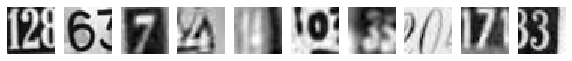

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [15]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

In [16]:
import tensorflow as tf

trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [18]:
trainY[0:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model = Sequential()
model.add(Dense(1024, input_shape = (1024,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
sgd = optimizers.Adam(lr = 0.1)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
_________________________________________________________________


In [21]:
model.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 500, verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 42000 samples, validate on 18000 samples
Epoch 1/500





42000/42000 [==============================] - 10s 242us/step - loss: 2.3945 - acc: 0.1100 - val_loss: 2.2977 - val_acc: 0.1072
Epoch 2/500
42000/42000 [==============================] - 1s 17us/step - loss: 2.2432 - acc: 0.1582 - val_loss: 2.2770 - val_acc: 0.1347
Epoch 3/500
42000/42000 [==============================] - 1s 17us/step - loss: 2.1837 - acc: 0.1735 - val_loss: 2.4156 - val_acc: 0.1074
Epoch 4/500
42000/42000 [==============================] - 1s 18us/step - loss: 2.1407 - acc: 0.2124 - val_loss: 2.1392 - val_acc: 0.2249
Epoch 5/500
42000/42000 [==============================] - 1s 17us/step - loss: 2.1616 - acc: 0.1903 - val_loss: 2.4416 - val_acc: 0.1856
Epoch 6/500
42000/42000 [==============================] - 1s 17us/step - loss: 2.1860 - acc: 0.1782 - val_loss: 2.0418 - val_acc: 0.2967
Epoch 7/500
42000/

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model2 = Sequential()
model2.add(Dense(1024, input_shape = (1024,), activation = 'linear'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1024, activation = 'linear'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = 'linear'))
sgd = optimizers.Adam(lr = 0.3)
model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model2.summary()
model2.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 500, verbose = 1)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
________________________________________

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model2 = Sequential()
model2.add(Dense(1024, input_shape = (1024,), activation = 'tanh'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1024, activation = 'tanh'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation = 'tanh'))
sgd = optimizers.Adam(lr = 0.3)
model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model2.summary()
model2.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 500, verbose = 1)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
________________________________________

KeyboardInterrupt: ignored

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model3 = Sequential()
model3.add(Dense(1024, input_shape = (1024,), activation = 'sigmoid'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(1024, activation = 'sigmoid'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation = 'sigmoid'))
sgd = optimizers.Adam(lr = 0.3)
model3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model3.summary()
model3.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 500, verbose = 1)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_4 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
________________________________________

KeyboardInterrupt: ignored

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model4 = Sequential()
model4.add(Dense(1024, input_shape = (1024,), activation = 'sigmoid'))
model4.add(BatchNormalization())
model4.add(Dropout(0.5))
model4.add(Dense(1024, activation = 'sigmoid'))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation = 'sigmoid'))
sgd = optimizers.Adam(lr = 0.3)
model4.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model4.summary()
model4.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 500, verbose = 1)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
________________________________________

KeyboardInterrupt: ignored

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
from keras.layers import LeakyReLU
model5 = Sequential()
model5.add(Dense(1024, input_shape = (1024,)))
model5.add(BatchNormalization())
model5.add(LeakyReLU(alpha=0.01))
model5.add(Dense(10))
sgd = optimizers.Adam(lr = 0.01)
model5.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model5.summary()
model5.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 500, epochs = 500, verbose = 1)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_9 (Batch (None, 1024)              4096      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                10250     
Total params: 1,063,946
Trainable params: 1,061,898
Non-trainable params: 2,048
_________________________________________________________________
Train on 42000 samples, validate on 18000 samples
Epoch 1/500
42000/42000 [==============================] - 2s 41us/step - loss: 6.9022 - acc: 0.1012 - val_loss: 6.1623 - val_acc: 0.0981
Epoch 2/500
42000/42000 [========================

KeyboardInterrupt: ignored

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model_final = Sequential()
model_final.add(Dense(units = 1024, input_shape = (1024,), activation = 'relu'))
model_final.add(BatchNormalization())
model_final.add(Dropout(0.5))
model_final.add(Dense(units = 1024, activation = 'relu'))
model_final.add(Dense(units = 10, activation = 'relu'))
sgd = optimizers.SGD(lr = 0.1, momentum=0.9, nesterov=True)
model_final.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
model_final.summary()
model_final.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 1000, epochs = 100, verbose = 1)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_13 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_37 (Dense)             (None, 10)                10250     
Total params: 2,113,546
Trainable params: 2,111,498
Non-trainable params: 2,048
_________________________________________________________________
Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================

Train on 42000 samples, validate on 18000 samples
Epoch 1/500
42000/42000 [==============================] - 2s 43us/step - loss: 2.4554 - acc: 0.1199 - val_loss: 2.2753 - val_acc: 0.1660
Epoch 2/500
42000/42000 [==============================] - 1s 16us/step - loss: 2.2764 - acc: 0.1620 - val_loss: 2.2370 - val_acc: 0.2227
Epoch 3/500
42000/42000 [==============================] - 1s 16us/step - loss: 2.2448 - acc: 0.2093 - val_loss: 2.1757 - val_acc: 0.3187
Epoch 4/500
42000/42000 [==============================] - 1s 16us/step - loss: 2.1880 - acc: 0.2587 - val_loss: 2.0611 - val_acc: 0.3826
Epoch 5/500
42000/42000 [==============================] - 1s 16us/step - loss: 2.1400 - acc: 0.2453 - val_loss: 2.1352 - val_acc: 0.2539
Epoch 6/500
42000/42000 [==============================] - 1s 16us/step - loss: 2.1502 - acc: 0.2421 - val_loss: 2.2073 - val_acc: 0.1512
Epoch 7/500
42000/42000 [==============================] - 1s 16us/step - loss: 3.6359 - acc: 0.1892 - val_loss: 5.1269 - 

KeyboardInterrupt: ignored

# Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (2.5 points)

# Implement batch normalization for training the neural network (2.5 points)

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
model_final1 = Sequential()
model_final1.add(Dense(units = 1024, input_shape = (1024,), activation = 'relu'))
model_final1.add(BatchNormalization())
model_final1.add(Dropout(0.5))
model_final1.add(Dense(units = 1024, activation = 'relu'))
model_final1.add(Dropout(0.4))
model_final1.add(Dense(units = 1024, activation = 'relu'))
model_final1.add(Dropout(0.3))
model_final1.add(Dense(units = 1024, activation = 'relu'))
model_final1.add(Dropout(0.2))
model_final1.add(Dense(units = 1024, activation = 'relu'))
model_final1.add(Dropout(0.1))
model_final1.add(Dense(units = 1024, activation = 'relu'))
model_final1.add(Dropout(0.05))
model_final1.add(Dense(units = 10, activation = 'relu'))
model_final1.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])
model_final1.summary()
model_final1.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 2500, epochs = 1000, verbose = 1)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_27 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_65 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_110 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_66 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_111 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_67 (Dropout)         (None, 1024)            

In [67]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
from keras.layers import Conv2D, MaxPooling2D
model_final2 = Sequential()
model_final2.add(Dense(units = 1024, input_shape = (1024,), activation = 'relu', kernel_initializer=initializers.he_normal(seed=10), bias_initializer=initializers.Zeros()))
model_final2.add(BatchNormalization())
model_final2.add(Dropout(0.1))
model_final2.add(Dense(units = 1024, activation = 'relu'))
model_final2.add(Dropout(0.1))
model_final2.add(Dense(units = 1024, activation = 'relu'))
model_final2.add(Dropout(0.1))
model_final2.add(Dense(units = 10, activation = 'softmax'))
model_final2.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])
model_final2.summary()
model_final2.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 100, epochs = 25, verbose = 1)

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_201 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_39 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_144 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_202 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_145 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_203 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_146 (Dropout)        (None, 1024)            

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import optimizers
from keras import initializers
from keras.layers import Conv2D, MaxPooling2D
model_final3 = Sequential()
model_final3.add(Dense(units = 1024, input_shape = (1024,), activation = 'relu', kernel_initializer=initializers.he_normal(seed=10), bias_initializer=initializers.Zeros()))
model_final3.add(BatchNormalization())
model_final3.add(Dropout(0.1))
model_final3.add(Dense(units = 1024, activation = 'relu'))
model_final3.add(Dropout(0.1))
model_final3.add(Dense(units = 1024, activation = 'relu'))
model_final3.add(Dropout(0.1))
model_final3.add(Dense(units = 10, activation = 'softmax'))
model_final3.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
model_final3.summary()
model_final3.fit(X_train_flat, trainY, validation_data=(X_test_flat,testY), batch_size = 100, epochs = 25, verbose = 1)

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_209 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_41 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_150 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_210 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_151 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_211 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dropout_152 (Dropout)        (None, 1024)            

In [87]:
# LEt us try a CNN architecture with Keras 
#Ref :: https://stats.stackexchange.com/questions/272607/cifar-10-cant-get-above-60-accuracy-keras-with-tensorflow-backend
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, Flatten

n_classes = 10

X_train_conv = X_train.reshape(42000,32,32,1)
X_test_conv = X_test.reshape(18000,32,32,1)
model_new = Sequential()
model_new.add(Conv2D(input_shape=(32,32,1), filters=32, 
                 use_bias=True, kernel_size=(3,3)))
model_new.add(Activation('relu'))
model_new.add(Dropout(0.1))
model_new.add(Conv2D(filters=64, use_bias=False, kernel_size=(5,5), strides=2))
model_new.add(Activation('relu'))
model_new.add(Dropout(0.2))
model_new.add(Flatten())
model_new.add(Dense(128))
model_new.add(Activation('relu'))
model_new.add(Dropout(0.3))
model_new.add(Dense(n_classes, activation="softmax"))
model_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])
model_new.summary()
model_new.fit(X_train_conv, trainY, validation_data=(X_test_conv,testY), batch_size = 100, epochs = 50, verbose = 1)

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
activation_27 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_179 (Dropout)        (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 13, 13, 64)        51200     
_________________________________________________________________
activation_28 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_180 (Dropout)        (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10816)           

In [0]:
predy_nn = model_new.predict(X_test_conv)

In [89]:
predy_nn.shape

(18000, 10)

In [92]:
y_test.shape

(18000,)

In [0]:
from sklearn import metrics
print("KNN Metrics = \n", metrics.classification_report(y_test, predy_nn))

# Understand the differences and trade-offs between traditional and NN classifiers with the help of classification metrics (5 points)

Traditional KNearestNeighbor method :: 
1. We have to prerun and determine the value of K
2. After that we have limited number of parameters to tweak to improve accuracy
3. Able to achieve maximum accuracy of 64 %

Neural network
1. We have higher level of granularity on tweaking parameters
2. Initially i had a tough time getting accuracy beyond 40- 50 %
3. But there are various functions and options to add intermidiate layers with non-linear activation functions to tweak
4. With normal Neural Networks i was able to achieve 80% + accuracy
5. I also tried with Convolutional NN to experiment and achieved 89 % accuracy